In [48]:
#import library
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

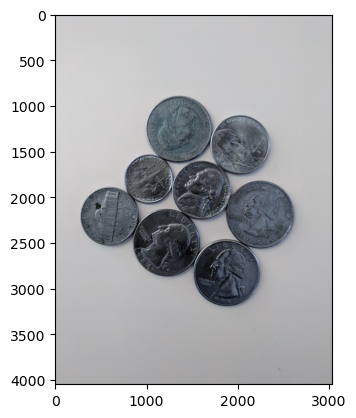

In [49]:
#read img
coins_img = cv2.imread('coins_on_white.jpg')
plt.imshow(coins_img, cmap = 'gray')

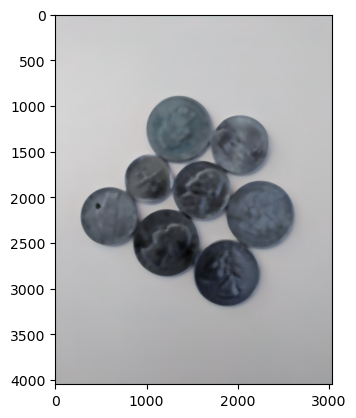

In [50]:
#bluring img
blur_img = cv2.medianBlur(coins_img, ksize = 45)
plt.imshow(blur_img, cmap = 'gray')

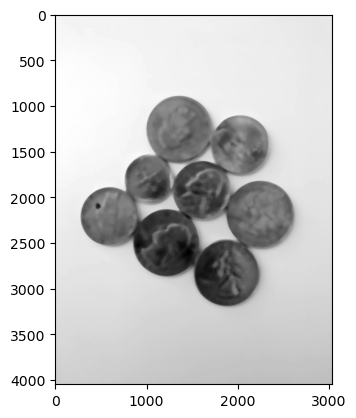

In [51]:
#convert img to gray
gray_img = cv2.cvtColor(blur_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap = 'gray')

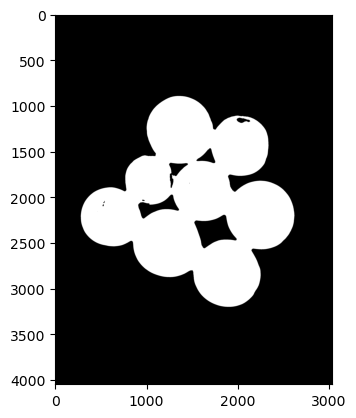

In [52]:
#Apply Threshold (Inverse Binary with OTSU as well)
ret, tresh = cv2.threshold(gray_img, 200, 255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(tresh, cmap = 'gray')

In [53]:
#Grab Background that you are sure of
sure_bg = cv2.dilate(tresh, (3,3), iterations = 3)

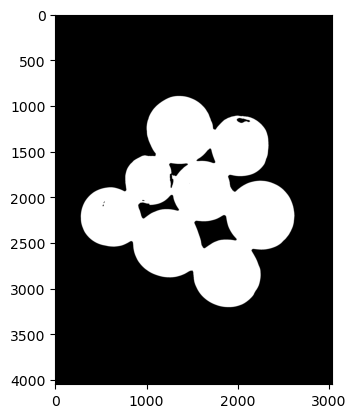

In [54]:
plt.imshow(sure_bg, cmap = 'gray')

In [55]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(tresh,cv2.DIST_L2,3)
ret, sure_fg = cv2.threshold(dist_transform,0.4*dist_transform.max(),255,0)

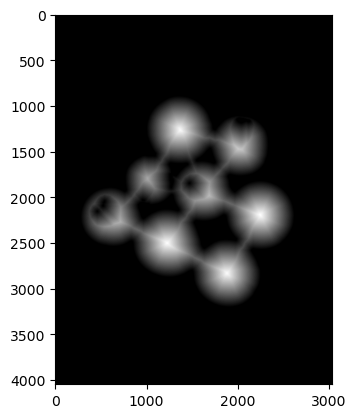

In [56]:
plt.imshow(dist_transform, cmap = 'gray' )

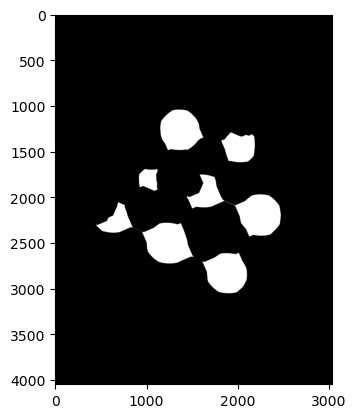

In [57]:
plt.imshow(sure_fg, cmap = 'gray')

In [58]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

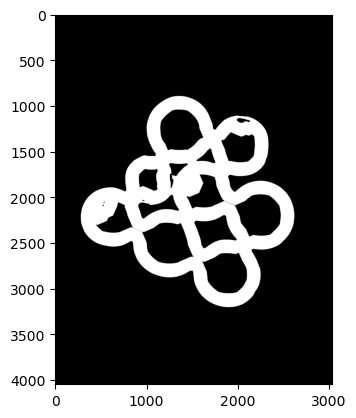

In [59]:
plt.imshow(unknown, cmap = 'gray')

In [60]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

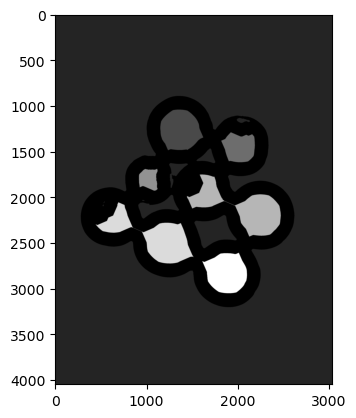

In [61]:
plt.imshow(markers,cmap='gray')

In [62]:
markers = cv2.watershed(blur_img,markers)

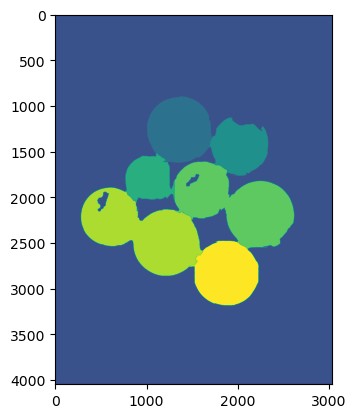

In [63]:
plt.imshow(markers)

In [64]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(coins_img, contours, i, (255, 0, 0), 10)

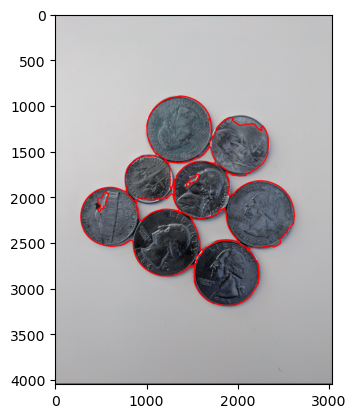

In [65]:
plt.imshow(coins_img)